_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

In [4]:
res = requests.get(url)
dom = BeautifulSoup(res.text, "lxml")

In [36]:
tags = dom.select(".box-content > h2 > a")
titles = [tag.text.strip() for tag in tags]

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [37]:
limit = 80
long_titles = []

for title in titles:
    if 80 < len(title):
        long_titles.append(title)
        
long_titles

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 2. List Comprehension

In [38]:
[title for title in titles if 80 < len(title)]

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 3. Filter with named function

In [46]:
def anything_longer_than_80(string):
    return 80 < len(string)

list(filter(anything_longer_than_80, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 4. Filter with anonymous function

In [47]:
list(filter(lambda s: 80 < len(s), titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [48]:
import pandas as pd

In [62]:
df = pd.DataFrame({'title': titles})
df[df.title.str.len() > 80]

,title
19,Code like an accountant: Designing data system...
28,Debugging PySpark -- Or trying to make sense o...
46,How we designed an inclusivity-first conferenc...
51,"Listen, Attend, and Walk : Interpreting natura..."
78,The Hare Wins the Race: Getting the most out o...


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

In [65]:
df.apply(lambda s: s);

### title length

In [72]:
df['title_length'] = df['title'].apply(lambda s: len(s));
df.head()

,title,title_length
0,A Bit about Bytes: Understanding Python Bytecode,48
1,Adapting from Spark to Dask: what to expect,43
2,All in the timing: How side channel attacks work,48
3,Analyzing Data: What pandas and SQL Taught Me ...,69
4,A practical guide to Singular Value Decomposit...,59


### long title

In [73]:
df['is_long_title'] = df['title'].apply(lambda s: 80 < len(s))
df.head()

,title,title_length,is_long_title
0,A Bit about Bytes: Understanding Python Bytecode,48,False
1,Adapting from Spark to Dask: what to expect,43,False
2,All in the timing: How side channel attacks work,48,False
3,Analyzing Data: What pandas and SQL Taught Me ...,69,False
4,A practical guide to Singular Value Decomposit...,59,False


### first letter

In [74]:
df['title_first_letter'] = df['title'].apply(lambda s: s[0])
df.head()

,title,title_length,is_long_title,title_first_letter
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A
1,Adapting from Spark to Dask: what to expect,43,False,A
2,All in the timing: How side channel attacks work,48,False,A
3,Analyzing Data: What pandas and SQL Taught Me ...,69,False,A
4,A practical guide to Singular Value Decomposit...,59,False,A


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [ ]:
!pip install textstat

In [104]:
import textstat as stats

for method in dir(stats):
    blacklist = ["attribute", "textstat"]
    if "__" not in method and method not in blacklist:
        # Magical!
        df[method] = df['title'].apply(getattr(stats, method))

df.head()

automated_readability_index
avg_character_per_word
avg_letter_per_word
avg_sentence_length
avg_sentence_per_word
avg_syllables_per_word
char_count
coleman_liau_index
dale_chall_readability_score
difficult_words
flesch_kincaid_grade
flesch_reading_ease
gunning_fog
letter_count
lexicon_count
linsear_write_formula
lix
polysyllabcount
remove_punctuation
sentence_count
smog_index
syllable_count
text_standard


,title,title_length,is_long_title,title_first_letter,flesch_reading_ease,automated_readability_index,avg_character_per_word,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,...,letter_count,lexicon_count,linsear_write_formula,lix,polysyllabcount,remove_punctuation,sentence_count,smog_index,syllable_count,text_standard
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,64.37,10.3,6.00,5.86,7.0,0.14,...,41,7,3.5,35.57,1,A Bit about Bytes Understanding Python Bytecode,1,0.0,11,8th and 9th grade
1,Adapting from Spark to Dask: what to expect,43,False,A,88.74,3.8,4.50,4.38,8.0,0.13,...,35,8,3.0,20.50,0,Adapting from Spark to Dask what to expect,1,0.0,10,2nd and 3rd grade
2,All in the timing: How side channel attacks work,48,False,A,87.72,4.0,4.44,4.33,9.0,0.11,...,39,9,3.5,42.33,0,All in the timing How side channel attacks work,1,0.0,12,3rd and 4th grade
3,Analyzing Data: What pandas and SQL Taught Me ...,69,False,A,50.84,7.3,4.83,4.75,12.0,0.08,...,57,12,7.0,28.67,2,Analyzing Data What pandas and SQL Taught Me A...,1,0.0,20,9th and 10th grade
4,A practical guide to Singular Value Decomposit...,59,False,A,28.50,9.8,5.67,5.67,9.0,0.11,...,51,9,6.5,42.33,3,A practical guide to Singular Value Decomposit...,1,0.0,18,9th and 10th grade


In [106]:
df[df['lexicon_count'] <= 3]

,title,title_length,is_long_title,title_first_letter,flesch_reading_ease,automated_readability_index,avg_character_per_word,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,...,letter_count,lexicon_count,linsear_write_formula,lix,polysyllabcount,remove_punctuation,sentence_count,smog_index,syllable_count,text_standard
6,Automating Code Quality,23,False,A,9.21,13.0,7.00,7.00,3.0,0.33,...,21,3,2.5,69.67,2,Automating Code Quality,1,0.0,7,12th and 13th grade
8,Behavior-Driven Python,22,False,B,-49.00,29.0,10.50,10.00,2.0,0.50,...,20,2,1.0,52.00,1,BehaviorDriven Python,1,0.0,6,20th and 21st grade
21,Coding through Adversity,24,False,C,9.21,14.6,7.33,7.33,3.0,0.33,...,22,3,1.5,69.67,1,Coding through Adversity,1,0.0,7,12th and 13th grade
52,Love your bugs,14,False,L,119.19,-1.2,4.00,4.00,3.0,0.33,...,12,3,0.5,3.00,0,Love your bugs,1,0.0,3,0th and 1st grade
57,Practical Sphinx,16,False,P,35.61,14.9,7.50,7.50,2.0,0.50,...,15,2,1.0,52.00,1,Practical Sphinx,1,0.0,4,11th and 12th grade
76,Taking Django Async,19,False,T,59.97,6.8,5.67,5.67,3.0,0.33,...,17,3,0.5,3.00,0,Taking Django Async,1,0.0,5,6th and 7th grade


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [110]:
df.rename(columns={'title_length': 'title charachter count'}).head()

,title,title charachter count,is_long_title,title_first_letter,flesch_reading_ease,automated_readability_index,avg_character_per_word,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,...,letter_count,lexicon_count,linsear_write_formula,lix,polysyllabcount,remove_punctuation,sentence_count,smog_index,syllable_count,text_standard
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,64.37,10.3,6.00,5.86,7.0,0.14,...,41,7,3.5,35.57,1,A Bit about Bytes Understanding Python Bytecode,1,0.0,11,8th and 9th grade
1,Adapting from Spark to Dask: what to expect,43,False,A,88.74,3.8,4.50,4.38,8.0,0.13,...,35,8,3.0,20.50,0,Adapting from Spark to Dask what to expect,1,0.0,10,2nd and 3rd grade
2,All in the timing: How side channel attacks work,48,False,A,87.72,4.0,4.44,4.33,9.0,0.11,...,39,9,3.5,42.33,0,All in the timing How side channel attacks work,1,0.0,12,3rd and 4th grade
3,Analyzing Data: What pandas and SQL Taught Me ...,69,False,A,50.84,7.3,4.83,4.75,12.0,0.08,...,57,12,7.0,28.67,2,Analyzing Data What pandas and SQL Taught Me A...,1,0.0,20,9th and 10th grade
4,A practical guide to Singular Value Decomposit...,59,False,A,28.50,9.8,5.67,5.67,9.0,0.11,...,51,9,6.5,42.33,3,A practical guide to Singular Value Decomposit...,1,0.0,18,9th and 10th grade


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [111]:
df.describe()

,title_length,flesch_reading_ease,automated_readability_index,avg_character_per_word,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,avg_syllables_per_word,char_count,coleman_liau_index,...,flesch_kincaid_grade,gunning_fog,letter_count,lexicon_count,linsear_write_formula,lix,polysyllabcount,sentence_count,smog_index,syllable_count
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000
mean,46.442105,55.144105,9.271579,5.760211,5.641053,7.142105,0.165895,1.707368,40.189474,12.007263,...,7.342105,17.782105,39.273684,7.189474,3.713158,41.738105,1.105263,1.010526,0.0,11.905263
std,17.560664,33.965119,5.655832,1.261887,1.262435,2.910603,0.077315,0.410304,14.946212,6.776851,...,4.645464,8.032441,14.553235,2.903757,2.006627,18.339712,1.046511,0.102598,0.0,4.647291
min,14.000000,-49.000000,-6.600000,2.750000,2.750000,2.000000,0.050000,1.000000,11.000000,-7.260000,...,-2.700000,1.200000,11.000000,2.000000,0.500000,3.000000,0.000000,1.000000,0.0,3.000000
25%,35.000000,32.055000,5.400000,4.750000,4.635000,5.000000,0.110000,1.400000,31.000000,7.355000,...,3.700000,13.685000,30.000000,5.000000,2.500000,29.000000,0.000000,1.000000,0.0,9.000000
50%,45.000000,57.270000,9.100000,5.670000,5.500000,7.000000,0.140000,1.700000,39.000000,11.560000,...,6.800000,16.930000,38.000000,7.000000,3.500000,42.330000,1.000000,1.000000,0.0,11.000000
75%,56.000000,81.290000,13.100000,6.500000,6.355000,9.000000,0.200000,2.000000,48.500000,16.580000,...,10.550000,22.000000,47.500000,9.000000,4.500000,54.000000,2.000000,1.000000,0.0,15.000000
max,100.000000,119.190000,29.000000,10.500000,10.000000,19.000000,0.500000,3.000000,81.000000,27.400000,...,20.600000,34.000000,79.000000,19.000000,11.000000,85.000000,4.000000,2.000000,0.0,25.000000


In [113]:
import numpy as np

df.describe(exclude=np.number)

,title,is_long_title,title_first_letter,remove_punctuation,text_standard
count,95,95,95,95,95
unique,95,2,21,95,20
top,Oops! I Committed My Password To GitHub!,False,P,Python Performance Investigation by Example,2nd and 3rd grade
freq,1,90,12,1,9


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [122]:
df.sort_values(by='title_length').head()

,title,title_length,is_long_title,title_first_letter,flesch_reading_ease,automated_readability_index,avg_character_per_word,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,...,lexicon_count,linsear_write_formula,lix,polysyllabcount,remove_punctuation,sentence_count,smog_index,syllable_count,text_standard,lower_title_first_letter
52,Love your bugs,14,False,L,119.19,-1.2,4.00,4.00,3.0,0.33,...,3,0.5,3.0,0,Love your bugs,1,0.0,3,0th and 1st grade,l
77,The AST and Me,14,False,T,118.18,-6.6,2.75,2.75,4.0,0.25,...,4,1.0,4.0,0,The AST and Me,1,0.0,4,-1th and 0th grade,t
57,Practical Sphinx,16,False,P,35.61,14.9,7.50,7.50,2.0,0.50,...,2,1.0,52.0,1,Practical Sphinx,1,0.0,4,11th and 12th grade,p
76,Taking Django Async,19,False,T,59.97,6.8,5.67,5.67,3.0,0.33,...,3,0.5,3.0,0,Taking Django Async,1,0.0,5,6th and 7th grade,t
44,HOWTO Write a Function,22,False,H,75.88,2.9,4.75,4.75,4.0,0.25,...,4,1.0,29.0,0,HOWTO Write a Function,1,0.0,6,3rd and 4th grade,h


Titles sorted reverse alphabetically

In [123]:
df['lower_title_first_letter'] = df['title_first_letter'].apply(lambda s: s.lower())
df.sort_values(by='lower_title_first_letter', ascending=False).head()

,title,title_length,is_long_title,title_first_letter,flesch_reading_ease,automated_readability_index,avg_character_per_word,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,...,lexicon_count,linsear_write_formula,lix,polysyllabcount,remove_punctuation,sentence_count,smog_index,syllable_count,text_standard,lower_title_first_letter
94,You're an expert. Here's how to teach like one.,47,False,Y,109.21,1.2,4.33,3.89,4.5,0.22,...,9,1.25,15.61,0,Youre an expert Heres how to teach like one,2,0.0,10,-1th and 0th grade,y
93,Win back lovely API: GraphQL in Python,38,False,W,106.67,3.6,4.57,4.43,7.0,0.14,...,7,2.50,21.29,0,Win back lovely API GraphQL in Python,1,0.0,8,-1th and 0th grade,w
91,What is a Python Core Developer?,32,False,W,73.85,2.8,4.50,4.33,6.0,0.17,...,6,3.00,22.67,1,What is a Python Core Developer,1,0.0,9,2nd and 3rd grade,w
90,Visual Testing with PyCharm and pytest,38,False,V,73.85,7.5,5.50,5.50,6.0,0.17,...,6,2.00,39.33,0,Visual Testing with PyCharm and pytest,1,0.0,9,11th and 12th grade,v
89,Visualizing Algorithms with Python and Program...,56,False,V,22.07,15.7,7.14,7.14,7.0,0.14,...,7,5.50,49.86,3,Visualizing Algorithms with Python and Program...,1,0.0,15,11th and 12th grade,v


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [129]:
df['title_first_letter'].value_counts()

P    12
B    11
T    11
C     8
A     7
D     7
S     6
H     5
E     5
R     3
L     3
F     3
W     2
V     2
U     2
O     2
G     2
Y     1
"     1
i     1
I     1
Name: title_first_letter, dtype: int64

Percentage of talks with long titles

In [133]:
df['is_long_title']

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.010526
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.010526
29    0.000000
        ...   
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
73    0.000000
74    0.000000
75    0.000000
76    0.000000
77    0.000000
78    0.010526
79    0.000000
80    0.000000
81    0.000000
82    0.000000
83    0.000000
84    0.000000
85    0.000000
86    0.000000
87    0.000000
88    0.000000
89    0.000000
90    0.000000
91    0.000000
92    0.000000
93    0.000000
94    0.000000
Name: is_long_title, Length: 95, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

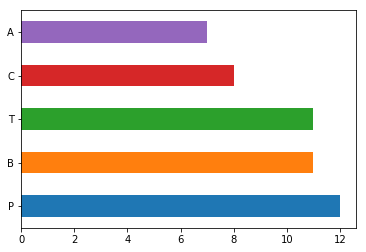

In [141]:
%matplotlib inline

(df['title_first_letter']
    .value_counts()
    .head(5)
    .plot
    .barh());

Histogram of title lengths, in characters

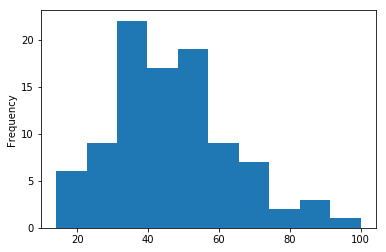

In [147]:
df['title_length'].plot.hist()

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [148]:
import requests
import numpy as np
import pandas as pd
import textstat as stats
from bs4 import BeautifulSoup

In [168]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'
res = requests.get(url)
dom = BeautifulSoup(res.text, "lxml")

In [169]:
els = dom.select('.presentation-description')
descs = [el.text.strip() for el in els]
df = pd.DataFrame({'description': descs})

In [182]:
df['character_count'] = df['description'].apply(len)
df['word_count'] = df['description'].apply(stats.lexicon_count)
df['could_fit_in_a_tweet'] = df['character_count'] <= 280
df['could_fit_in_an_old_tweet'] = df['character_count'] <= 140
df['grade_level'] = df['description'].apply(stats.flesch_kincaid_grade)

In [183]:
df.head()

,description,character_count,word_count,could_fit_in_a_tweet,grade_level,could_fit_in_an_old_tweet
0,At some point every Python programmer sees Pyt...,440,78,False,7.4,False
1,"Until very recently, Apache Spark has been a d...",881,141,False,14.3,False
2,"In this talk, youâll learn about a category ...",647,96,False,11.9,False
3,"âSo tell me,â my manager said, âwhat is ...",1080,178,False,16.0,False
4,Recommender systems have become increasingly p...,1147,188,False,18.0,False


In [184]:
df.describe()

,character_count,word_count,grade_level
count,95.000000,95.000000,95.000000
mean,846.063158,134.578947,18.117895
std,450.107713,70.019082,15.835652
min,201.000000,35.000000,3.700000
25%,550.000000,91.500000,10.500000
50%,758.000000,119.000000,13.800000
75%,978.000000,149.500000,17.950000
max,2794.000000,436.000000,107.800000


In [185]:
df['could_fit_in_a_tweet'].value_counts()

False    92
True      3
Name: could_fit_in_a_tweet, dtype: int64

In [187]:
df['could_fit_in_an_old_tweet'].value_counts()

False    95
Name: could_fit_in_an_old_tweet, dtype: int64

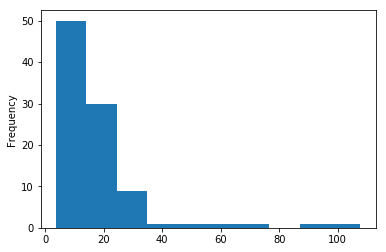

In [186]:
df['grade_level'].plot.hist()

Answers:
    - For the `word_count` feature: the average is `134.578947`, the minimum is `35.000000`, and the
      max is `436.000000`.
    - About `92` of the descriptions could not fit in a 280 character tweet, none could fit in 140 characters 
    - The distribution of grade levels shows a positively skwed distribution, as might've been inferred from the
      description of the data